In [1808]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors


In [1809]:
def create_grid(Nx, Ny, Lx, Ly):
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    X, Y = np.meshgrid(x, y)
    return X, Y, dx, dy

In [1810]:
    
with h5py.File("../outputs/output_lid_driven_Re_1000/data_059400.h5", "r") as f:
    phi0 = f["phi"][:]
    sigma_xx0 = f["sigma_xx"][:]
    sigma_xy0 = f["sigma_xy"][:]
    sigma_yy0 = f["sigma_yy"][:]
    X10 = f["X1"][:]
    X20 = f["X2"][:]
    J0 = f["J"][:]
    a0 = f["a"][:]
    b0 = f["b"][:]
    p0 = f["p"][:]
    div_vel0 = f["div_vel"][:]

with h5py.File("../outputs/output_lid_driven_Re_100/data_068000.h5", "r") as f:
    phi = f["phi"][:]
    sigma_xx = f["sigma_xx"][:]
    sigma_xy = f["sigma_xy"][:]
    sigma_yy = f["sigma_yy"][:]
    X1 = f["X1"][:]
    X2 = f["X2"][:]
    J = f["J"][:]
    a = f["a"][:]
    b = f["b"][:]
    p = f["p"][:]
    div_vel = f["div_vel"][:]

In [1811]:
# plot the benchmark at cavity center line
Ny0 = Nx0 = 128
Ny = Nx = 128
y0 = np.linspace(0, 1, Ny0)
y = np.linspace(0, 1, Ny)

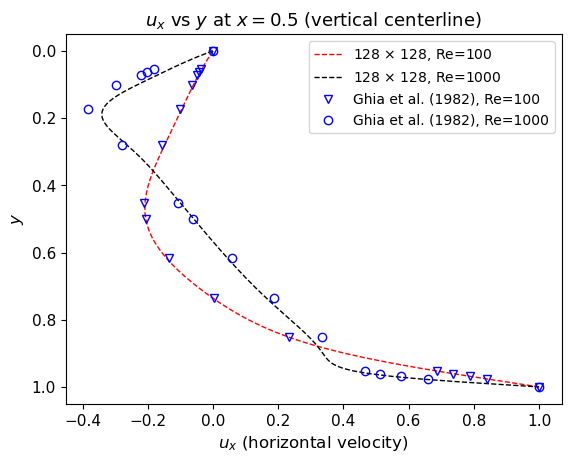

In [1812]:
# a = gaussian_filter(a, sigma=1)
# a0 = gaussian_filter(a0, sigma=1)
u_center_x = a[:, Nx // 2]  # u_x at center vertical line
u_center_x0 = a0[:, Nx0 // 2]  # u_x at center vertical line

# load plot_u_y_Ghia100.csv first column y and second column u
u_ghia = np.loadtxt("../data/plot_u_y_Ghia100.csv", delimiter=",", skiprows=1)
y_ghia = u_ghia[:, 0]
u_ghia = u_ghia[:, 1]

u_ghia_1 = np.loadtxt("../data/plot_u_y_Ghia1000.csv", delimiter=",", skiprows=1)
y_ghia_1 = u_ghia_1[:, 0]
u_ghia_1 = u_ghia_1[:, 1]

plt.plot(u_center_x, y, 'r--', linewidth=1, label=r"128 $\times$ 128, Re=100")
plt.plot(u_center_x0, y0, "k--", linewidth=1, label=r"128 $\times$ 128, Re=1000")
plt.plot(u_ghia, y_ghia, "vb", markersize=6, markerfacecolor='none', label="Ghia et al. (1982), Re=100")
plt.plot(u_ghia_1, y_ghia_1, "ob", markersize=6, markerfacecolor='none', label="Ghia et al. (1982), Re=1000")

plt.xlabel(r"$u_x$ (horizontal velocity)", fontsize=12)
plt.ylabel(r"$y$", fontsize=12)
plt.title(r"$u_x$ vs $y$ at $x=0.5$ (vertical centerline)", fontsize=13)
# plt.grid(True)
plt.gca().invert_yaxis()
plt.legend()
plt.tick_params(labelsize=11)
plt.show()

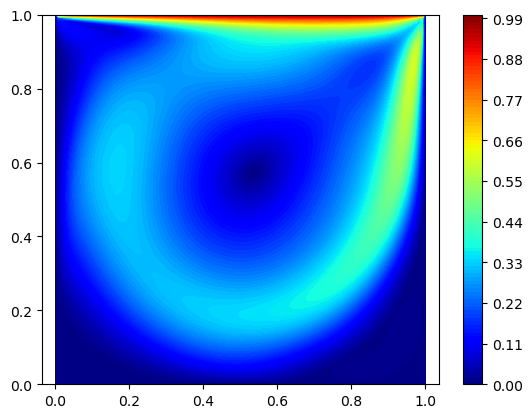

In [1813]:

Lx, Ly = 1.0, 1.0
X, Y, dx, dy = create_grid(Nx, Ny, Lx, Ly)
X0, Y0, dx0, dy0 = create_grid(Nx0, Ny0, Lx, Ly)


dpdx, dpdy = np.gradient(p0, dx, dy)

plt.contourf(X, Y, np.sqrt(a0**2+b0**2), levels=100, cmap="jet")
plt.colorbar()
plt.contour(X,Y, phi, levels=[0])
plt.axis('equal')
plt.show()

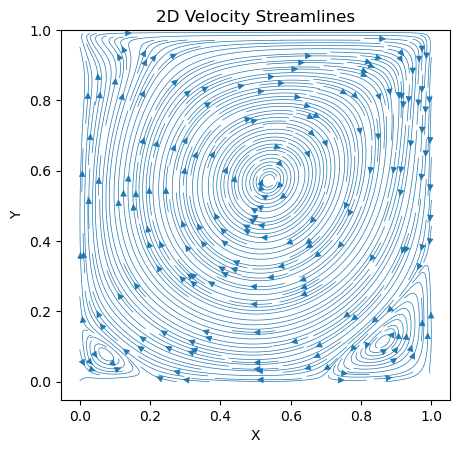

In [1814]:
# Create Meshgrid for 3D surface plot
Lx, Ly = 1.0, 1.0
X, Y, dx, dy = create_grid(Nx, Ny, Lx, Ly)

# plot 2D velocity streamlines
fig, ax = plt.subplots()
ax.streamplot(X, Y, a0, b0, linewidth=0.5, density=3.5)
ax.set_title('2D Velocity Streamlines')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.gca().set_aspect('equal')

ax.contour(X, Y, phi, levels=[0], colors='black', linewidths=2.5, linestyles='--')
plt.show()

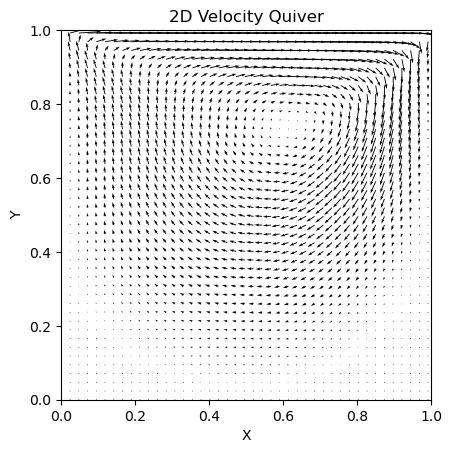

In [1815]:
# plot 2D velocity quiver
fig, ax = plt.subplots()
ax.quiver(X[::3, ::3], Y[::3, ::3], a[::3, ::3], b[::3, ::3], angles='xy', scale_units='xy', scale=10.5, color='k')
ax.set_title('2D Velocity Quiver')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.gca().set_aspect('equal')
plt.contour(X, Y, phi, levels=[0])
plt.show()
